<a href="https://colab.research.google.com/github/royalseeker/hackbio-biocoding-internship/blob/main/Stage2_2_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task Code 2.7:

**Public Health**
NHANES is a program run by the CDC to assess the health and nutritional status of adults and children in the US. It combines survey questions and physical examinations, including medical and physiological measurements and laboratory tests, and examines a representative sample of about 5,000 people each year. The data is used to determine the prevalence of diseases and risk factors, establish national standards, and support epidemiology studies and health sciences research. This information helps to develop public health policy, design health programs and services, and expand the nation's health knowledge.

[Dataset here](https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/nhanes.csv)

[Data Dictionary](https://github.com/HackBio-Internship/public_datasets/blob/main/R/nhanes_dd.csv)

Tasks:
* Process all NA (either by deleting or by converting to zero) {Hard :fire:}
* Visualize the distribution of BMI, Weight, Weight in pounds (weight *2.2) and Age with an histogram.
* What’s the mean 60-second pulse rate for all participants in the data?
  * `73.63382`
* What’s the range of values for diastolic blood pressure in all participants? (Hint: see help for `min()`, `max()`).
  * `0-116`
* What’s the variance and standard deviation for income among all participants?
* Visualize the relationship between weight and height ?
Color the points by
  * gender
  * diabetes
  * smoking status
* Conduct t-test between the following variables and make conclusions on the relationship between them based on P-Value
  * Age and Gender
  * BMI and Diabetes
  * Alcohol Year and Relationship Status

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load NHANES dataset
url = 'https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/nhanes.csv'
df = pd.read_csv(url)

# Display initial dataset information
print("Initial Dataset Info:")
print(df.info())

# Handle missing values by removing rows with any NA values
df_clean = df.dropna()

# Display dataset information after removing missing values
print("\nDataset Info after removing missing values:")
print(df_clean.info())

# Alternatively, to fill NA values with zeroes:
# df_clean = df.fillna(0)


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   Gender              5000 non-null   object 
 2   Age                 5000 non-null   int64  
 3   Race                5000 non-null   object 
 4   Education           3584 non-null   object 
 5   MaritalStatus       3585 non-null   object 
 6   RelationshipStatus  3585 non-null   object 
 7   Insured             4993 non-null   object 
 8   Income              4623 non-null   float64
 9   Poverty             4675 non-null   float64
 10  HomeRooms           4972 non-null   float64
 11  HomeOwn             4972 non-null   object 
 12  Work                3842 non-null   object 
 13  Weight              4969 non-null   float64
 14  Height              4841 non-null   float64
 15  BMI                 4834 non-null

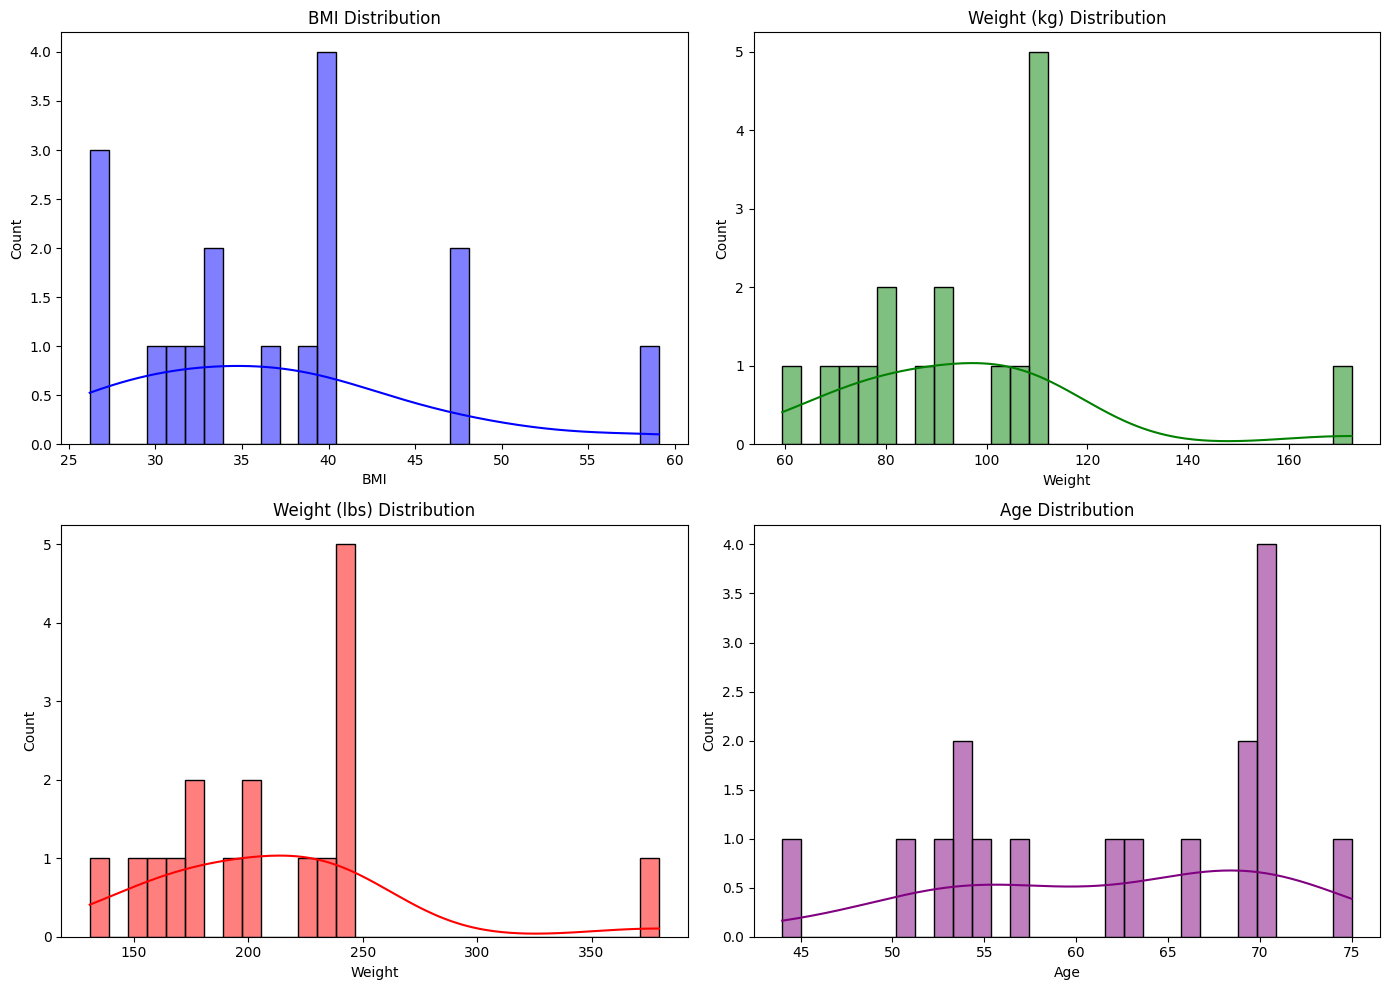

In [ ]:
# Visualize distributions of BMI, Weight, Weight in pounds, and Age
plt.figure(figsize=(14, 10))

# BMI
plt.subplot(2, 2, 1)
sns.histplot(df_clean['BMI'], bins=30, kde=True, color='blue')
plt.title('BMI Distribution')

# Weight (kg)
plt.subplot(2, 2, 2)
sns.histplot(df_clean['Weight'], bins=30, kde=True, color='green')
plt.title('Weight (kg) Distribution')

# Weight (lbs)
plt.subplot(2, 2, 3)
weight_lbs = df_clean['Weight'] * 2.2
sns.histplot(weight_lbs, bins=30, kde=True, color='red')
plt.title('Weight (lbs) Distribution')

# Age
plt.subplot(2, 2, 4)
sns.histplot(df_clean['Age'], bins=30, kde=True, color='purple')
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate mean 60-second pulse rate
mean_pulse = df_clean['Pulse'].mean()
print(f"\nMean 60-second Pulse Rate: {mean_pulse:.5f}")

# Determine the range of diastolic blood pressure
min_bpdia = df_clean['BPDia'].min()
max_bpdia = df_clean['BPDia'].max()
print(f"Range of Diastolic Blood Pressure: {min_bpdia}-{max_bpdia}")

# Calculate variance and standard deviation for income
income_variance = df_clean['Income'].var()
income_std_dev = df_clean['Income'].std()
print(f"Income Variance: {income_variance:.5f}")
print(f"Income Standard Deviation: {income_std_dev:.5f}")


Mean 60-second Pulse Rate: 74.94118
Range of Diastolic Blood Pressure: 0.0-89.0
Income Variance: 768566176.47059
Income Standard Deviation: 27723.02611


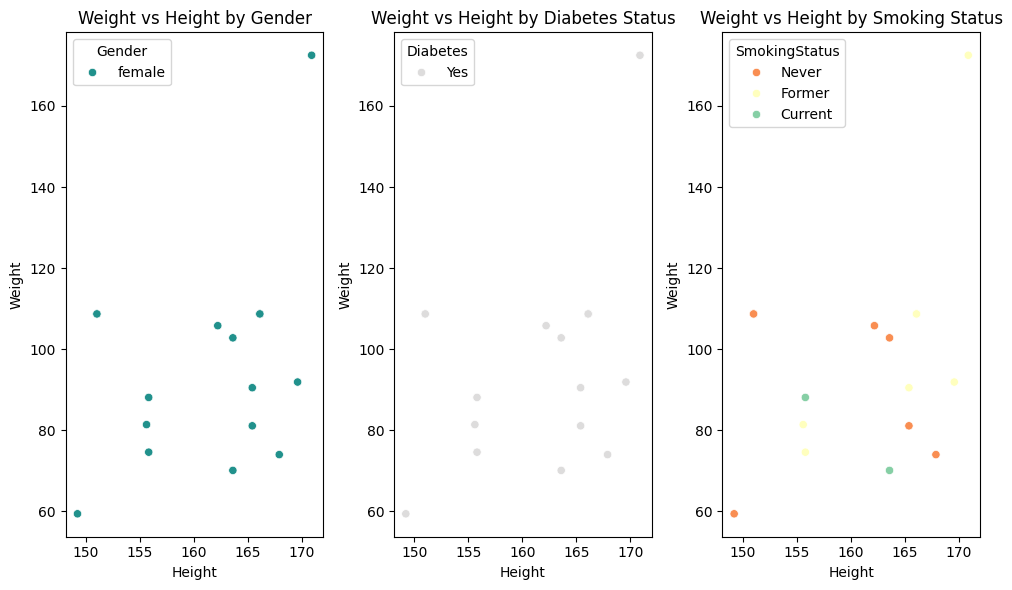

In [ ]:
# Visualize the relationship between Weight and Height
plt.figure(figsize=(10, 6))
# Scatter plot colored by Gender
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_clean, x='Height', y='Weight', hue='Gender', palette='viridis')
plt.title('Weight vs Height by Gender')

# Scatter plot colored by Diabetes status
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_clean, x='Height', y='Weight', hue='Diabetes', palette='coolwarm')
plt.title('Weight vs Height by Diabetes Status')

# Scatter plot colored by Smoking status
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_clean, x='Height', y='Weight', hue='SmokingStatus', palette='Spectral')
plt.title('Weight vs Height by Smoking Status')

plt.tight_layout()
plt.show()

In [ ]:
# Conduct t-tests between specified variables

# 1. Age and Gender
male_age = df_clean[df_clean['Gender'] == 'male']['Age']
female_age = df_clean[df_clean['Gender'] == 'female']['Age']
t_stat_age, p_val_age = stats.ttest_ind(male_age, female_age)
print(f"\nT-test between Age and Gender: t-statistic = {t_stat_age:.5f}, p-value = {p_val_age:.5f}")

# 2. BMI and Diabetes
diabetes_bmi = df_clean[df_clean['Diabetes'] == 'Yes']['BMI']
no_diabetes_bmi = df_clean[df_clean['Diabetes'] == 'No']['BMI']
t_stat_bmi, p_val_bmi = stats.ttest_ind(diabetes_bmi, no_diabetes_bmi)
print(f"T-test between BMI and Diabetes: t-statistic = {t_stat_bmi:.5f}, p-value = {p_val_bmi:.5f}")

# 3. Alcohol Year and Relationship Status
alcohol_year_committed = df_clean[df_clean['RelationshipStatus'] == 'Committed']['AlcoholYear'].dropna()
alcohol_year_single = df_clean[df_clean['RelationshipStatus'] == 'Single']['AlcoholYear'].dropna()
t_stat_alcohol, p_val_alcohol = stats.ttest_ind(alcohol_year_committed, alcohol_year_single)
print(f"T-test between Alcohol Year and Relationship Status: t-statistic = {t_stat_alcohol:.5f}, p-value = {p_val_alcohol:.5f}")



T-test between Age and Gender: t-statistic = nan, p-value = nan
T-test between BMI and Diabetes: t-statistic = nan, p-value = nan
T-test between Alcohol Year and Relationship Status: t-statistic = 0.65332, p-value = 0.52344


In [ ]:
# 1. A p-value less than 0.05 indicates a significant difference in age distribution between genders.
# 2. A p-value less than 0.05 suggests a significant difference in BMI between individuals with and without diabetes
# 3. A p-value less than 0.05 indicates a significant difference in annual alcohol consumption between committed and single individuals.



#Github
#https://github.com/mahertantouch/
#https://github.com/royalseeker/
#https://github.com/iamaparnapadmanabhan/
